/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


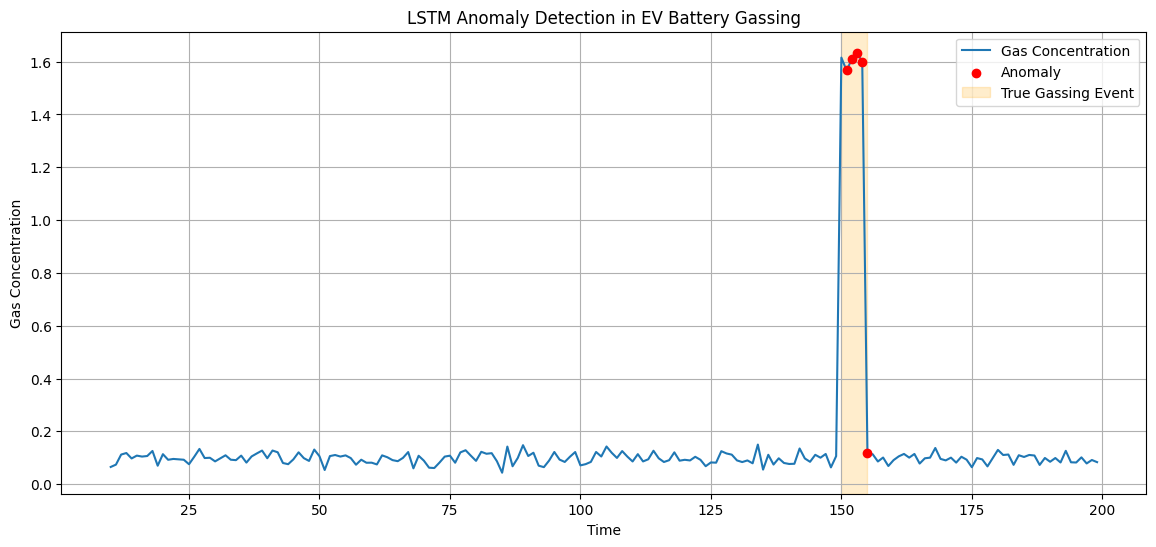

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.optimizers import Adam

# 1. Generate mock data
np.random.seed(0)
time = np.arange(0, 200)
temperature = 25 + 0.05 * time + np.random.normal(0, 0.5, len(time))
internal_pressure = 1 + 0.01 * time + np.random.normal(0, 0.1, len(time))
voltage = 4.2 - 0.002 * time + np.random.normal(0, 0.05, len(time))
gas_concentration = np.random.normal(0.1, 0.02, len(time))
atmospheric_pressure = 1.0 + np.random.normal(0, 0.02, len(time))
vibration = np.random.normal(0.2, 0.05, len(time))

# Inject gassing anomaly
gas_concentration[150:155] += 1.5
internal_pressure[150:155] += 0.5
temperature[150:155] += 2
vibration[150:155] += 0.3

# DataFrame
df = pd.DataFrame({
    'temperature': temperature,
    'internal_pressure': internal_pressure,
    'voltage': voltage,
    'gas_concentration': gas_concentration,
    'atmospheric_pressure': atmospheric_pressure,
    'vibration': vibration
})

# 2. Normalize
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df)

# 3. Create sequences
def create_sequences(data, target_index, window_size):
    X, y = [], []
    for i in range(window_size, len(data)):
        X.append(data[i-window_size:i, :])
        y.append(data[i, target_index])
    return np.array(X), np.array(y)

window_size = 10
target_index = list(df.columns).index('gas_concentration')
X, y = create_sequences(scaled_data, target_index, window_size)

# 4. Build LSTM Model
model = Sequential()
model.add(LSTM(64, input_shape=(X.shape[1], X.shape[2])))
model.add(Dense(1))
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

# 5. Train Model
history = model.fit(X, y, epochs=30, batch_size=16, verbose=0)

# 6. Predict
y_pred = model.predict(X)
mse = np.mean(np.square(y - y_pred), axis=1)

# 7. Detect Anomalies
threshold = np.mean(mse) + 3 * np.std(mse)
anomalies = mse > threshold

# 8. Visualize
plt.figure(figsize=(14, 6))
plt.plot(range(window_size, len(df)), df['gas_concentration'][window_size:], label='Gas Concentration')
# Fix: Use the indices from anomalies to select from the sliced gas concentration data
anomaly_indices_relative = np.where(anomalies)[0]
plt.scatter(anomaly_indices_relative + window_size, df['gas_concentration'][window_size:].iloc[anomaly_indices_relative], color='red', label='Anomaly', zorder=5)
plt.axvspan(150, 155, color='orange', alpha=0.2, label='True Gassing Event')
plt.xlabel('Time')
plt.ylabel('Gas Concentration')
plt.title('LSTM Anomaly Detection in EV Battery Gassing')
plt.legend()
plt.grid(True)
plt.show()

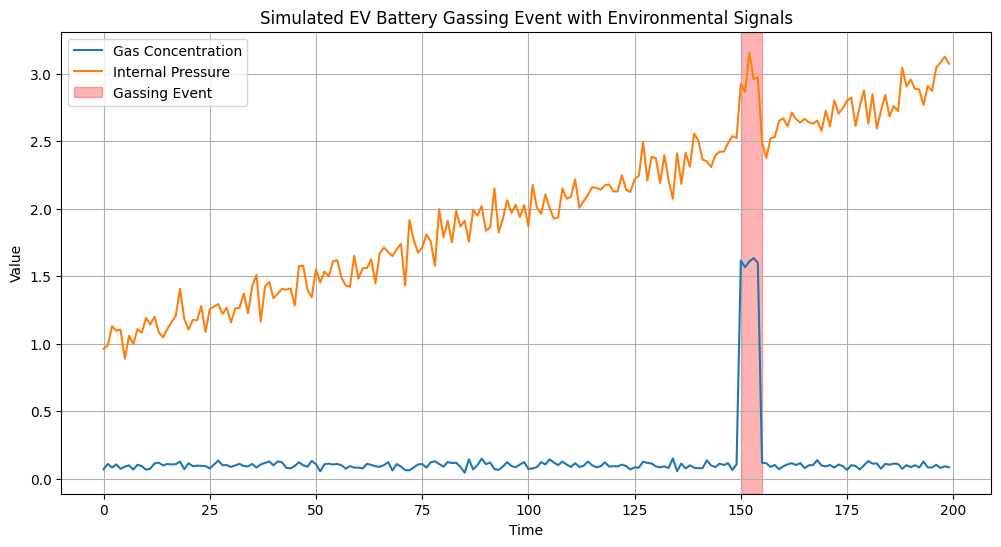

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Set seed for reproducibility
np.random.seed(0)

# Time range
time = np.arange(0, 200)

# Generate mock signals
temperature = 25 + 0.05 * time + np.random.normal(0, 0.5, len(time))
internal_pressure = 1 + 0.01 * time + np.random.normal(0, 0.1, len(time))
voltage = 4.2 - 0.002 * time + np.random.normal(0, 0.05, len(time))
gas_concentration = np.random.normal(0.1, 0.02, len(time))
atmospheric_pressure = 1.0 + np.random.normal(0, 0.02, len(time))  # ~1 atm, with noise
vibration = np.random.normal(0.2, 0.05, len(time))  # constant mild vibration with noise

# Inject anomaly (gassing event)
gas_concentration[150:155] += 1.5
internal_pressure[150:155] += 0.5
temperature[150:155] += 2
vibration[150:155] += 0.3

# Combine into DataFrame
data = pd.DataFrame({
    'time': time,
    'temperature': temperature,
    'internal_pressure': internal_pressure,
    'voltage': voltage,
    'gas_concentration': gas_concentration,
    'atmospheric_pressure': atmospheric_pressure,
    'vibration': vibration
})

# Visualize key signals
plt.figure(figsize=(12, 6))
plt.plot(data['time'], data['gas_concentration'], label='Gas Concentration')
plt.plot(data['time'], data['internal_pressure'], label='Internal Pressure')
plt.axvspan(150, 155, color='red', alpha=0.3, label='Gassing Event')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Simulated EV Battery Gassing Event with Environmental Signals')
plt.legend()
plt.grid(True)
plt.show()


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Epoch 1: Training Loss = 0.0078, Anomalies Detected = 3
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Epoch 2: Training Loss = 0.0079, Anomalies Detected = 2
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Epoch 3: Training Loss = 0.0088, Anomalies Detected = 2
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Epoch 4: Training Loss = 0.0092, Anomalies Detected = 2
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Epoch 5: Training Loss = 0.0092, Anomalies Detected = 3
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Epoch 6: Training Loss = 0.0078, Anomalies Detected = 3
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Epoch 7: Training Loss = 0.0076, Anomalies Detected = 3
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Epoch 8: Training Loss = 0.0083, Anomalies Detected = 3
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Epoch 9: Training Loss = 0.0078, Anomalies Detected = 2
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Epoch 10: Training Loss = 0.0069, Anomalies Detected = 2
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Epoch 11: Training Lo

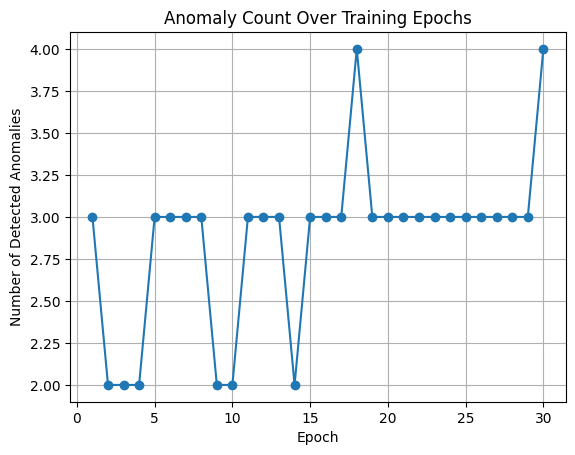

In [7]:
import numpy as np
import matplotlib.pyplot as plt

anomaly_counts = []

for epoch in range(30):
    history = model.fit(X, y, epochs=1, batch_size=16, verbose=0, shuffle=False)

    # Predict on all data after this epoch
    y_pred = model.predict(X).flatten()

    # Compute residuals (errors)
    residuals = np.abs(y.flatten() - y_pred)

    # Define anomaly threshold
    threshold = np.mean(residuals) + 3 * np.std(residuals)

    # Count anomalies this epoch
    anomalies = residuals > threshold
    anomaly_count = np.sum(anomalies)
    anomaly_counts.append(anomaly_count)

    print(f"Epoch {epoch+1}: Training Loss = {history.history['loss'][0]:.4f}, Anomalies Detected = {anomaly_count}")

# Plot anomaly count over epochs
plt.plot(range(1, 31), anomaly_counts, marker='o')
plt.xlabel('Epoch')
plt.ylabel('Number of Detected Anomalies')
plt.title('Anomaly Count Over Training Epochs')
plt.grid(True)
plt.show()


Anomaly time steps detected: [150 151 154 155]


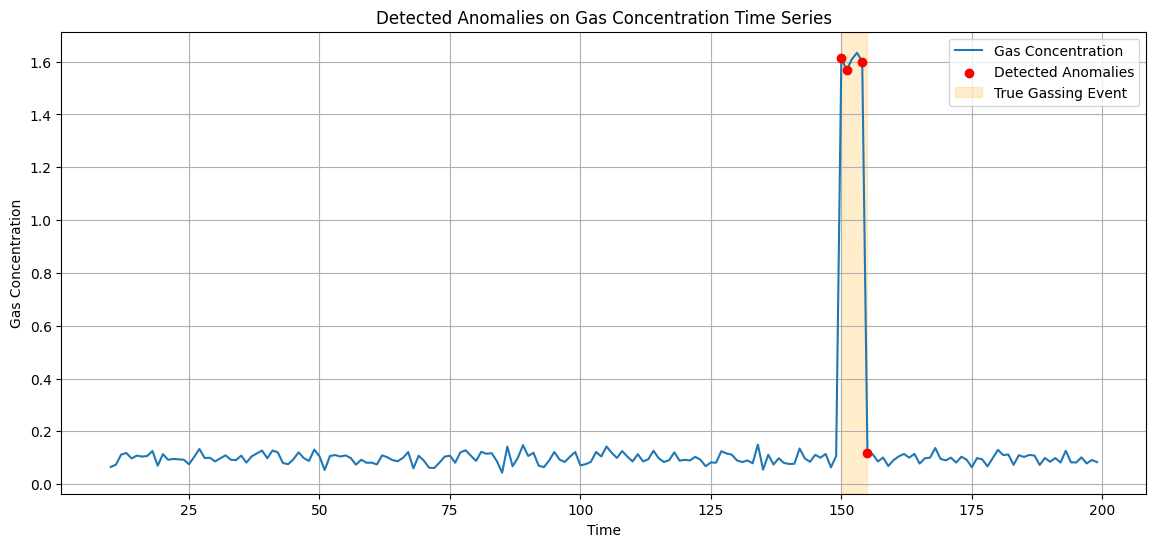

In [8]:
import matplotlib.pyplot as plt

# Example: Use the final epoch predictions and anomalies
# y_pred: predicted values from the last epoch
# y: actual values
# mse: squared error per sample
# anomalies: boolean array where True means anomaly

# Map anomalies to time indices (adjust for window size if used)
time_indices = np.arange(window_size, len(df))  # adjust if you use a window to create sequences
anomaly_times = time_indices[anomalies]

print("Anomaly time steps detected:", anomaly_times)

# Plot actual gas concentration with anomalies marked
plt.figure(figsize=(14,6))
plt.plot(time_indices, df['gas_concentration'][window_size:], label='Gas Concentration')
plt.scatter(anomaly_times, df['gas_concentration'].iloc[anomaly_times], color='red', label='Detected Anomalies', zorder=5)
plt.axvspan(150, 155, color='orange', alpha=0.2, label='True Gassing Event')
plt.xlabel('Time')
plt.ylabel('Gas Concentration')
plt.title('Detected Anomalies on Gas Concentration Time Series')
plt.legend()
plt.grid(True)
plt.show()
